In [66]:
import os
import pandas as pd
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report

from yellowbrick.classifier import ConfusionMatrix

In [2]:
base_files = os.path.join(os.getcwd(), '..', '..', 'data', 'files')

In [7]:
base_risco_credito = pd.read_csv(os.path.join(base_files, 'machine-learning-data-science-risco-credito.csv'))

In [8]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [20]:
x_base_risco_credito = base_risco_credito.iloc[:, 0:4].values
y_base_risco_credito = base_risco_credito.iloc[:, 4].values

In [22]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [23]:
x_base_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_base_risco_credito[:, 0])
x_base_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_base_risco_credito[:, 1])
x_base_risco_credito[:, 2] = label_encoder_garantias.fit_transform(x_base_risco_credito[:, 2])
x_base_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_base_risco_credito[:, 3])

In [24]:
x_base_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [26]:
with open('risco-credito.pkl', 'wb') as f:
    pickle.dump([x_base_risco_credito, y_base_risco_credito], f)

In [28]:
naive_risco_credito = GaussianNB()

In [29]:
naive_risco_credito.fit(x_base_risco_credito, y_base_risco_credito)

GaussianNB()

In [30]:
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [31]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [32]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [33]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [50]:
with open(os.path.join(os.getcwd(), '..', 'pre-processing', 'base-creditcard.pkl'), 'rb') as f:
    x_credit_training, x_credit_test, y_credit_training, y_credit_test = pickle.load(f)

In [51]:
x_credit_training.shape, x_credit_test.shape

((1500, 3), (500, 3))

In [52]:
y_credit_training.shape, y_credit_test.shape

((1500,), (500,))

In [53]:
naive_creditcard = GaussianNB()
naive_creditcard.fit(x_credit_training, y_credit_training)

GaussianNB()

In [55]:
predict = naive_creditcard.predict(x_credit_test)

In [56]:
# 0 - paga
# 1 - não paga
predict


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
# dados reais
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
# y_credit_test - dados reais
# predict - classificação do ML
accuracy_score(y_credit_test, predict)

0.938

In [62]:
confusion_matrix(y_credit_test, predict)

array([[428,   8],
       [ 23,  41]])

0.938

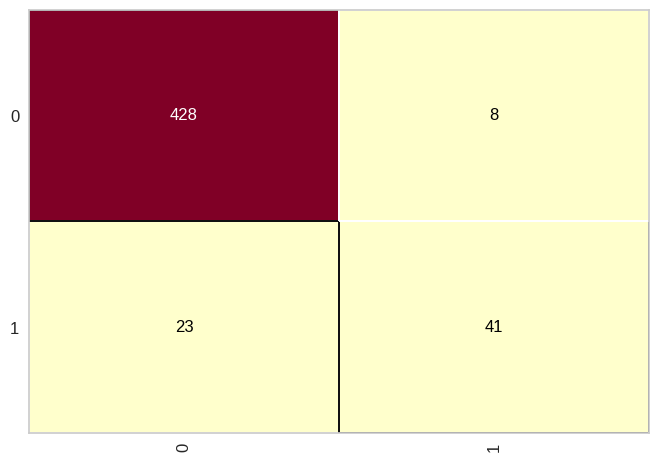

In [65]:
cm = ConfusionMatrix(naive_creditcard)
cm.fit(x_credit_training, y_credit_training)
cm.score(x_credit_test, y_credit_test)

In [67]:
print(classification_report(y_credit_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

